## Optics simulation (full)
From telescope entrance to focal plane after Lyot plate

In [224]:
from __future__ import division
exec(open('./prep.py'))
exec(open('./codes/func.py'))
exec(open('./codes/util.py'))
% matplotlib inline

---
## Masks
## <font color="red">later wrap below to a class or something (including plotting, unit conversions...)</font>

### Incident light

In [188]:
N_pix = 4096
One = np.ones((N_pix,N_pix))
Zer = np.zeros((N_pix,N_pix))

### Masks
#### read in...

In [28]:
primary_path  = '../masks/gemini_primary.fits'

## Y band - 1.02 um
apod_y_path = '../masks/gpi_y_apodizer.fits'
lyot_y_path = '../masks/gpi_y_lyot.fits'
fpm_y_path = '../masks/gpi_y_fpm.fits'
## J band - 1.22 um
apod_j_path = '../masks/gpi_j_apodizer.fits'
lyot_j_path = '../masks/gpi_j_lyot.fits'
fpm_j_path = '../masks/gpi_j_fpm.fits'
## H band - 1.65 um
apod_h_path = '../masks/gpi_h_apodizer.fits'
lyot_h_path = '../masks/gpi_h_lyot.fits'
fpm_h_path = '../masks/gpi_h_fpm.fits'
## K band - 2.19 um ; use K1
apod_k_path = '../masks/gpi_k1_apodizer.fits'
lyot_k_path = '../masks/gpi_k1_lyot.fits'
fpm_k_path = '../masks/gpi_k1_fpm.fits'

In [29]:
pri_d, pri_h  = read_fits(primary_path)

apo_y_d, apo_y_h  = read_fits(apod_y_path)
apo_j_d, apo_j_h  = read_fits(apod_j_path)
apo_h_d, apo_h_h  = read_fits(apod_h_path)
apo_k_d, apo_k_h  = read_fits(apod_k_path)

fpm_y_d, fpm_y_h  = read_fits(fpm_y_path)
fpm_j_d, fpm_j_h  = read_fits(fpm_j_path)
fpm_h_d, fpm_h_h  = read_fits(fpm_h_path)
fpm_k_d, fpm_k_h  = read_fits(fpm_k_path)

lyo_y_d, lyo_y_h  = read_fits(lyot_y_path)
lyo_j_d, lyo_j_h  = read_fits(lyot_j_path)
lyo_h_d, lyo_h_h  = read_fits(lyot_h_path)
lyo_k_d, lyo_k_h  = read_fits(lyot_k_path)

#### Take a look - for 'scaling'

Size = 1024 pixels; pixel scale = 0.0078125


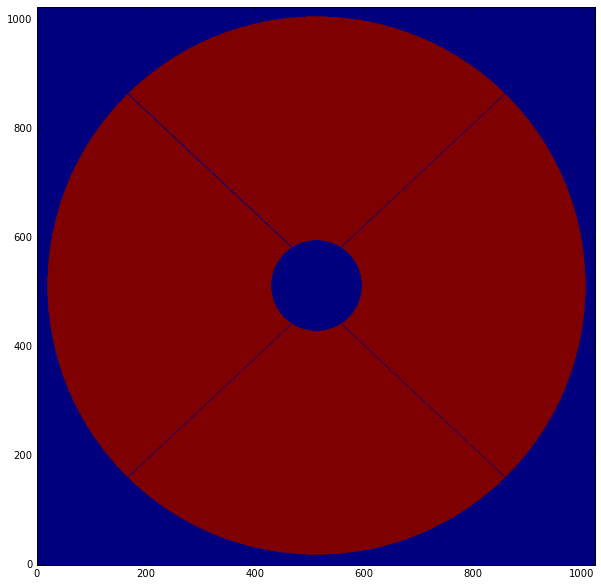

In [53]:
plt.figure(figsize=(10,10))
plt.imshow(pri_d,origin='lower')
print 'Size = %s pixels; pixel scale = %s' %(pri_h['NAXIS1'],pri_h['pixscale'])

Y band

Apodizer    size = 1024 pixels; pixel scale = 0.0078125
Coronagraph size = 1024 pixels; pixel scale = 0.00263671875
Lyot mask   size = 1024 pixels; pixel scale = 0.0078125


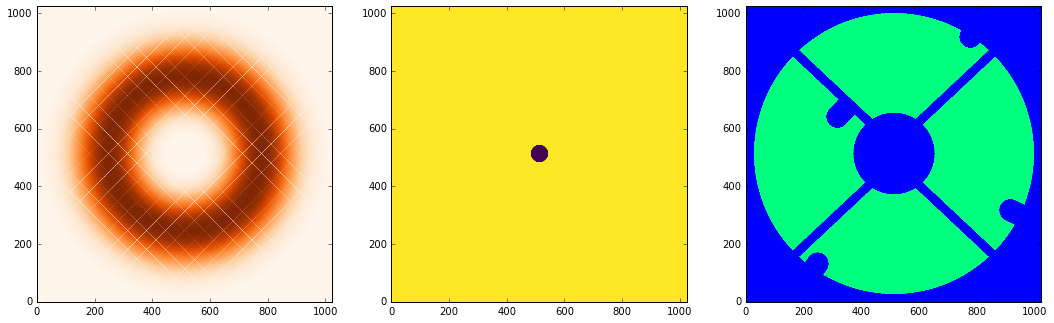

In [52]:
plt.figure(figsize=(18,36))
plt.subplot(131); plt.imshow(apo_y_d,origin='lower',cmap=plt.get_cmap('Oranges'))
plt.subplot(132); plt.imshow(fpm_y_d,origin='lower',cmap=plt.get_cmap('viridis'))
plt.subplot(133); plt.imshow(lyo_y_d,origin='lower',cmap=plt.get_cmap('winter'))
print 'Apodizer    size = %s pixels; pixel scale = %s' %(apo_y_h['NAXIS1'],apo_y_h['pixscale'])
print 'Coronagraph size = %s pixels; pixel scale = %s' %(fpm_y_h['NAXIS1'],fpm_y_h['pixscale'])
print 'Lyot mask   size = %s pixels; pixel scale = %s' %(lyo_y_h['NAXIS1'],lyo_y_h['pixscale'])

J band

Apodizer    size = 1024 pixels; pixel scale = 0.0078125
Coronagraph size = 1024 pixels; pixel scale = 0.00263671875
Lyot mask   size = 1024 pixels; pixel scale = 0.0078125


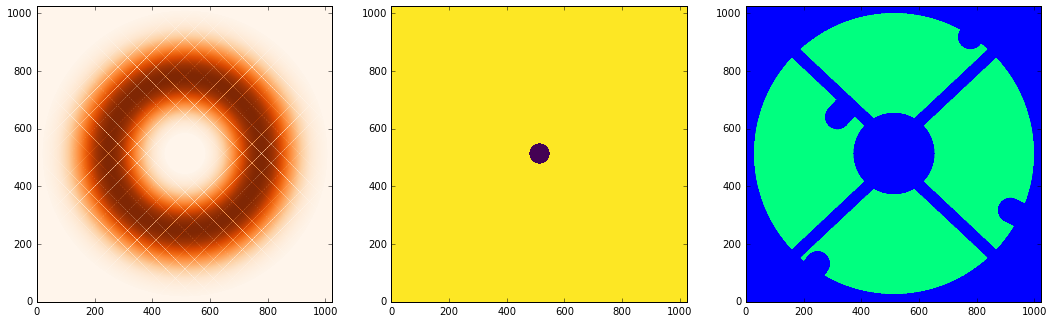

In [95]:
plt.figure(figsize=(18,36))
plt.subplot(131); plt.imshow(apo_j_d,origin='lower',cmap=plt.get_cmap('Oranges'))
plt.subplot(132); plt.imshow(fpm_j_d,origin='lower',cmap=plt.get_cmap('viridis'))
plt.subplot(133); plt.imshow(lyo_j_d,origin='lower',cmap=plt.get_cmap('winter'))
print 'Apodizer    size = %s pixels; pixel scale = %s' %(apo_j_h['NAXIS1'],apo_j_h['pixscale'])
print 'Coronagraph size = %s pixels; pixel scale = %s' %(fpm_j_h['NAXIS1'],fpm_j_h['pixscale'])
print 'Lyot mask   size = %s pixels; pixel scale = %s' %(lyo_j_h['NAXIS1'],lyo_j_h['pixscale'])

H band

Apodizer    size = 1024 pixels; pixel scale = 0.0078125
Coronagraph size = 1024 pixels; pixel scale = 0.00263671875
Lyot mask   size = 1024 pixels; pixel scale = 0.0078125


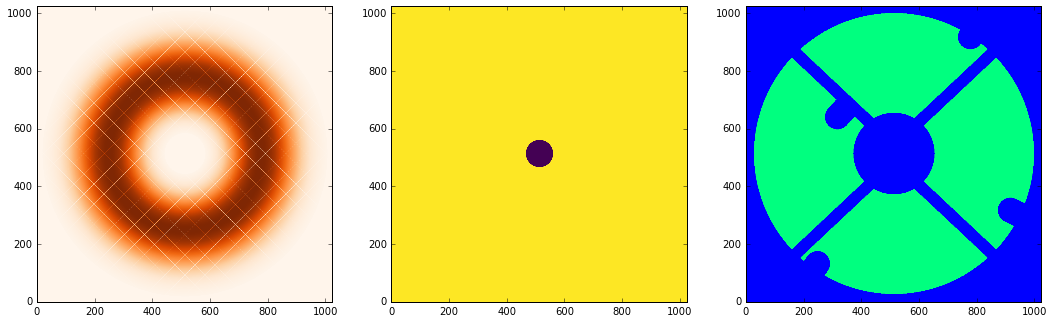

In [54]:
plt.figure(figsize=(18,36))
plt.subplot(131); plt.imshow(apo_h_d,origin='lower',cmap=plt.get_cmap('Oranges'))
plt.subplot(132); plt.imshow(fpm_h_d,origin='lower',cmap=plt.get_cmap('viridis'))
plt.subplot(133); plt.imshow(lyo_h_d,origin='lower',cmap=plt.get_cmap('winter'))
print 'Apodizer    size = %s pixels; pixel scale = %s' %(apo_h_h['NAXIS1'],apo_h_h['pixscale'])
print 'Coronagraph size = %s pixels; pixel scale = %s' %(fpm_h_h['NAXIS1'],fpm_h_h['pixscale'])
print 'Lyot mask   size = %s pixels; pixel scale = %s' %(lyo_h_h['NAXIS1'],lyo_h_h['pixscale'])

K band (k1)

Apodizer    size = 1024 pixels; pixel scale = 0.0078125
Coronagraph size = 1024 pixels; pixel scale = 0.00263671875
Lyot mask   size = 1024 pixels; pixel scale = 0.0078125


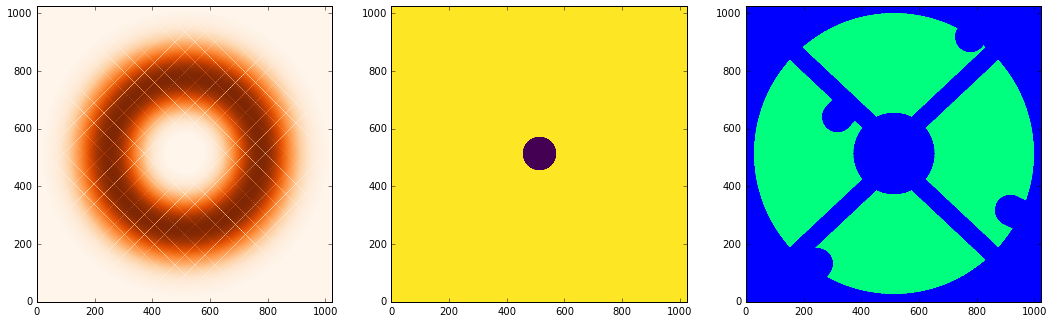

In [94]:
plt.figure(figsize=(18,36))
plt.subplot(131); plt.imshow(apo_k_d,origin='lower',cmap=plt.get_cmap('Oranges'))
plt.subplot(132); plt.imshow(fpm_k_d,origin='lower',cmap=plt.get_cmap('viridis'))
plt.subplot(133); plt.imshow(lyo_k_d,origin='lower',cmap=plt.get_cmap('winter'))
print 'Apodizer    size = %s pixels; pixel scale = %s' %(apo_k_h['NAXIS1'],apo_k_h['pixscale'])
print 'Coronagraph size = %s pixels; pixel scale = %s' %(fpm_k_h['NAXIS1'],fpm_k_h['pixscale'])
print 'Lyot mask   size = %s pixels; pixel scale = %s' %(lyo_k_h['NAXIS1'],lyo_k_h['pixscale'])

As expected the coronagraph and Lyot mask changes sizes accordingly with the wavelength.

_(Note: An attempt to expand the arrays into 1025 x 1025 failed because the interpolations would inevitably introduce non-zero numbers at pixels that must be zero, and vice versa. Instead, I modified the inputs to now have 1024 x 1024 grid)_

#### How big is the 'primary'?
This determines the 'sampling frequency' as defined in the `sim_opt` [notebook](https://github.com/Mipanox/GPI_stuff/blob/master/sim_opt.ipynb).

In [178]:
# parameters
D_tel = 7.8 * u.m
lba_h = 1.65 * u.um

## extension of the primary mask
allowedx = np.where(pri_d==1)[0]
Sampfreq = N_pix / (allowedx.max()-allowedx.min())

## 
pix_scale = D_tel / N_pix * Sampfreq ## physical scale
k_pix_arc = ((lba/Sampfreq/D_tel).to(u.dimensionless_unscaled)*u.rad).to(u.arcsec)
R_tel_p = N_pix / Sampfreq / 2 ## in pixel

## Inputs

To guarantee enough resolution, the masks cannot be binned. But DFT makes a large aperture small in the focal plane (and thus limited resolution there), so we need to pad the masks to the larger size...

In [186]:
pri_p = pad_zeros(pri_d,N_pix)

apo_y_p = pad_zeros(apo_y_d,N_pix)
apo_j_p = pad_zeros(apo_j_d,N_pix)
apo_h_p = pad_zeros(apo_h_d,N_pix)
apo_k_p = pad_zeros(apo_k_d,N_pix)

fpm_y_p = pad_zeros(fpm_y_d,N_pix)
fpm_j_p = pad_zeros(fpm_j_d,N_pix)
fpm_h_p = pad_zeros(fpm_h_d,N_pix)
fpm_k_p = pad_zeros(fpm_k_d,N_pix)

lyo_y_p = pad_zeros(lyo_y_d,N_pix)
lyo_j_p = pad_zeros(lyo_j_d,N_pix)
lyo_h_p = pad_zeros(lyo_h_d,N_pix)
lyo_k_p = pad_zeros(lyo_k_d,N_pix)

### Star light

In [189]:
Str_amp = One * pri_p
Str_pha = Zer * pri_p * u.rad

### Planet light
a point source with a "tip" in phase

In [225]:
## we can make it dimmer...
Pnt_amp = One * pri_p * 0.1 
## let's say... some 3000 nm tilt, in H band for the whole "grid"
tilt = (3000*u.nm/lba).to(u.dimensionless_unscaled)*u.rad
Pnt_pha = pri_p * grad_phase_x((-tilt/2,tilt/2),N_pix) * u.rad

---
### First focal plane

In [228]:
first_foc_ef  = Ef_after(Str_amp,Str_pha)
first_foc_int = Int_after(Str_amp,Str_pha)

first_pnt_int = Int_after(Pnt_amp,Pnt_pha)

(2024, 2072)

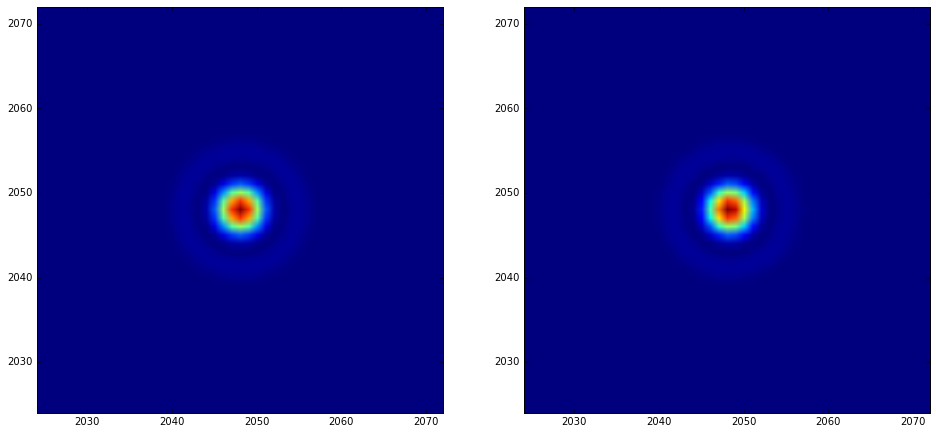

In [229]:
plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(first_foc_int,origin='lower')
plt.xlim(2024,2072); plt.ylim(2024,2072)

plt.subplot(122); plt.imshow(first_pnt_int,origin='lower')
plt.xlim(2024,2072); plt.ylim(2024,2072)

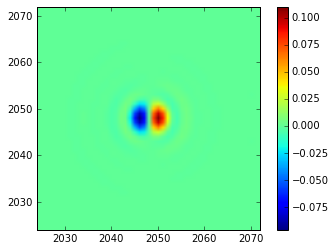

In [230]:
plt.imshow(first_pnt_int/first_pnt_int.max()-first_foc_int/first_foc_int.max(),origin='lower')
plt.xlim(2024,2072); plt.ylim(2024,2072); plt.colorbar()